In [ ]:
!pip -q install terra_ai
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


## Задание №1. Распознавание марки авто по фото.

Создайте нейросеть, которая будет распознавать марку авто по картинке из базы 'АВТО-3'

1. Скачайте базу
2. Покажите примеры из загруженной базы
3. Создайте выборки
4. Создайте полносвязную модель
5. Продемонстируйте схему созданной модели
6. Обучите свою модель и добейтесь точности 63%
7. Проведите тестирование



In [ ]:
# Скачиваем базу автомобилей
терра_ии.загрузить_базу(
    база = 'АВТО-3',
    справка = 'Показать'
)

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/car.zip
Вы скачали базу с изображениями марок автомобилей. 
База состоит из трех марок: Феррари, Мерседес и Рено
Количество изображений в базе: 3429


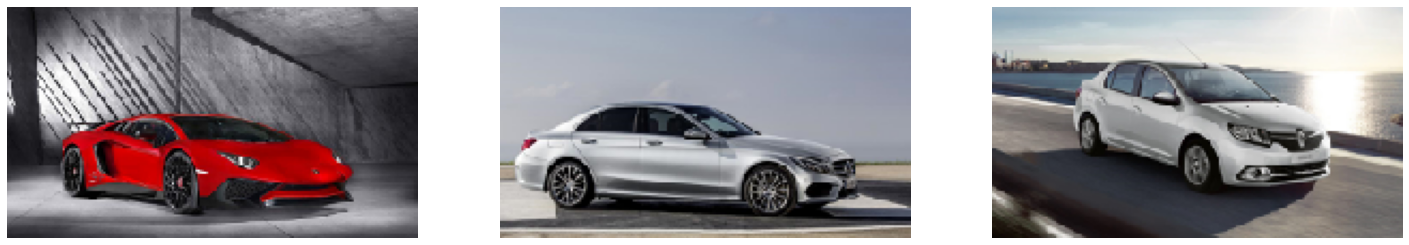

In [ ]:
# Примеры из базы
терра_ии.показать_примеры(
    путь='/автомобили')

In [ ]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки(
                                                                                                    путь='/автомобили',
                                                                                                    размер = (20, 60))

Созданы выборки: 
Размер сформированного массива обучающая_выборка: (3086, 20, 60, 3)
Размер сформированного массива метки_обучающей_выборки: (3086,)
Размер сформированного массива тестовая_выборка: (341, 20, 60, 3)
Размер сформированного массива метки_тестовой_выборки: (341,)


Создайте нейронную сеть, которая будет включать в себя полносвязные, выравнивающий и сверточные слои в формате:

```
# Пример: Полносвязный-128 (используем полновязный слой на 800 нейронов);
Сверточный2D-32-3 (используем сверточный слой на 32 нейрона с ядром свертки 3х3)

слои = 'Сверточный2D-16-3\
 Сверточный2D-32-3\
 Выравнивающий\
 Полносвязный-16\
 Полносвязный-3'
```
Попробуйте изменить количество нейронов, архитектуру и обучите модель

In [ ]:
# Указываем слои создаваемой модели
слои = 'Сверточный2D-64-2\
 Сверточный2D-64-2\
 Сверточный2D-16-6\
 Сверточный2D-16-5\
 Сверточный2D-16-4\
 Сверточный2D-16-3\
 Сверточный2D-16-2\
 Выравнивающий\
 Полносвязный-64\
 Полносвязный-16\
 Полносвязный-3'

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация изображений'
    )

Создана модель нейронной сети!


Покажите структуру сети, с помощью функции терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)

Схема модели:


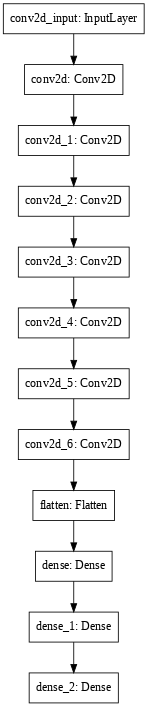

In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка)

Задайте параметры для обучения модели: 
1. Нейронка
2. Обучающая и проверочная выборки
3. Размер пакета
4. Количество эпох

Эпоха №1    Время обучения: 33.67c  Точность на обучающей выборке: 38.89%    Точность на проверочной выборке: 47.21%
Эпоха №2    Время обучения: 1.03c   Точность на обучающей выборке: 51.23%    Точность на проверочной выборке: 56.3%
Эпоха №3    Время обучения: 1.04c   Точность на обучающей выборке: 56.12%    Точность на проверочной выборке: 59.82%
Эпоха №4    Время обучения: 1.01c   Точность на обучающей выборке: 57.49%    Точность на проверочной выборке: 62.46%
Эпоха №5    Время обучения: 1.05c   Точность на обучающей выборке: 59.4%     Точность на проверочной выборке: 65.1%
Эпоха №6    Время обучения: 1.03c   Точность на обучающей выборке: 61.02%    Точность на проверочной выборке: 62.76%
Эпоха №7    Время обучения: 1.04c   Точность на обучающей выборке: 63.22%    Точность на проверочной выборке: 62.76%
Эпоха №8    Время обучения: 1.05c   Точность на обучающей выборке: 63.32%    Точность на проверочной выборке: 63.64%
Эпоха №9    Время обучения: 1.02c   Точность на обучающей выборке:

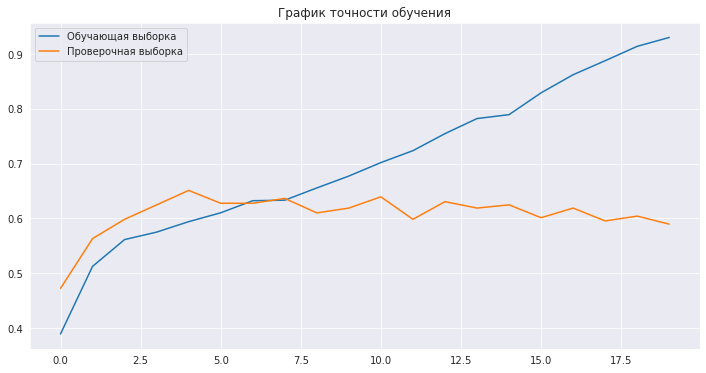

In [ ]:
# Обучаем модель
эксперимент = терра_ии.обучение_модели(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 20
    )

Укажите в функции терра_ии.тест_модели_классификации тестовую выборку и метки тестовой выборки

Тестовое изображение:


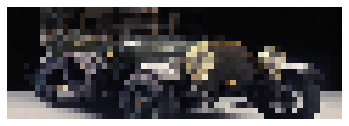


Результат предсказания модели:
Модель распознала модель Феррари на 8.79%
Модель распознала модель Мерседес на 61.41%
Модель распознала модель Рено на 29.8%
---------------------------
Правильный ответ:  Мерседес
---------------------------


Тестовое изображение:


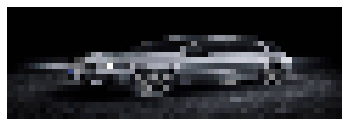


Результат предсказания модели:
Модель распознала модель Феррари на 8.86%
Модель распознала модель Мерседес на 74.68%
Модель распознала модель Рено на 16.47%
---------------------------
Правильный ответ:  Мерседес
---------------------------


Тестовое изображение:


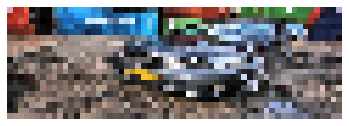


Результат предсказания модели:
Модель распознала модель Феррари на 8.88%
Модель распознала модель Мерседес на 49.22%
Модель распознала модель Рено на 41.89%
---------------------------
Правильный ответ:  Мерседес
---------------------------


Тестовое изображение:


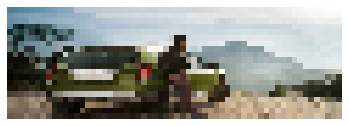


Результат предсказания модели:
Модель распознала модель Феррари на 30.43%
Модель распознала модель Мерседес на 22.99%
Модель распознала модель Рено на 46.58%
---------------------------
Правильный ответ:  Рено
---------------------------


Тестовое изображение:


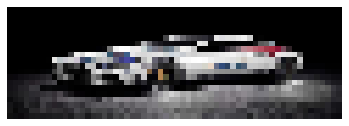


Результат предсказания модели:
Модель распознала модель Феррари на 14.75%
Модель распознала модель Мерседес на 76.91%
Модель распознала модель Рено на 8.34%
---------------------------
Правильный ответ:  Мерседес
---------------------------




In [ ]:
# Тестируем модель
терра_ии.тест_модели_классификации(
    нейронка,
    тестовый_набор = тестовая_выборка,
    правильные_ответы = метки_тестовой_выборки,
    классы = ['Феррари', 'Мерседес', 'Рено'],
    количество = 5)

## Задание №2. Классификация майонеза


Создайте нейросеть, которая будет распознавать фирму-производителя майонеза по картинке из базы 'МАЙОНЕЗ'
1. Скачайте базу
2. Покажите примеры из загруженной базы
3. Создайте выборки
4. Создайте полносвязную модель
5. Продемонстируйте схему созданной модели
5. Обучите свою модель, добейтесь точности распознавания 85%.
6. Проведите тестирование

In [ ]:
# Скачиваем базу майонезов
терра_ии.загрузить_базу(
    база = 'МАЙОНЕЗ',
    справка = 'Показать'
)

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/mayonnaise.zip
Вы скачали базу для классификации майонеза.


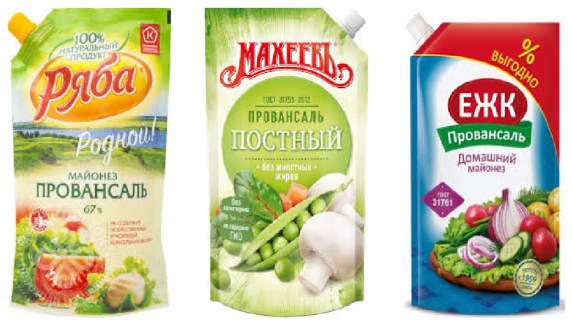

In [ ]:
# Примеры из базы
терра_ии.показать_примеры(
    путь='/Майонез')

In [ ]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки(путь='/Майонез', размер = (96, 76))

Созданы выборки: 
Размер сформированного массива обучающая_выборка: (135, 96, 76, 3)
Размер сформированного массива метки_обучающей_выборки: (135,)
Размер сформированного массива тестовая_выборка: (15, 96, 76, 3)
Размер сформированного массива метки_тестовой_выборки: (15,)


Создайте нейронную сеть, которая будет включать в себя полносвязные, выравнивающий и сверточные слои в формате:

```
# Пример: Полносвязный-128 (используем полновязный слой на 800 нейронов);
Сверточный2D-32-3 (используем сверточный слой на 32 нейрона с ядром свертки 3х3)

слои = 'Сверточный2D-32-3\
 Сверточный2D-32-3\
 Выравнивающий\
 Полносвязный-128\
 Полносвязный-3'
```
Попробуйте изменить количество нейронов, архитектуру и обучите модель

In [ ]:
# Указываем слои создаваемой модели
слои = 'Сверточный2D-32-3\
 Сверточный2D-32-3\
 Выравнивающий\
 Полносвязный-128\
 Полносвязный-3'

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация изображений'
    )

Создана модель нейронной сети!


Покажите структуру сети, с помощью функции терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)

Схема модели:


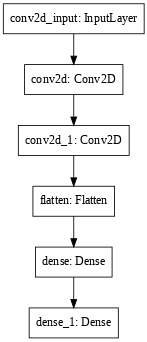

In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка)

Задайте параметры для обучения модели: 
1. Нейронка
2. Обучающая и проверочная выборки
3. Размер пакета
4. Количество эпох

Эпоха №1    Время обучения: 29.96c  Точность на обучающей выборке: 28.89%    Точность на проверочной выборке: 33.33%
Эпоха №2    Время обучения: 0.36c   Точность на обучающей выборке: 26.67%    Точность на проверочной выборке: 33.33%
Эпоха №3    Время обучения: 2.85c   Точность на обучающей выборке: 33.33%    Точность на проверочной выборке: 53.33%
Эпоха №4    Время обучения: 1.63c   Точность на обучающей выборке: 51.85%    Точность на проверочной выборке: 46.67%
Эпоха №5    Время обучения: 1.7c    Точность на обучающей выборке: 75.56%    Точность на проверочной выборке: 80.0%
Эпоха №6    Время обучения: 2.56c   Точность на обучающей выборке: 91.85%    Точность на проверочной выборке: 80.0%
Эпоха №7    Время обучения: 0.44c   Точность на обучающей выборке: 96.3%     Точность на проверочной выборке: 93.33%
Эпоха №8    Время обучения: 0.39c   Точность на обучающей выборке: 97.78%    Точность на проверочной выборке: 100.0%
Эпоха №9    Время обучения: 0.41c   Точность на обучающей выборке:

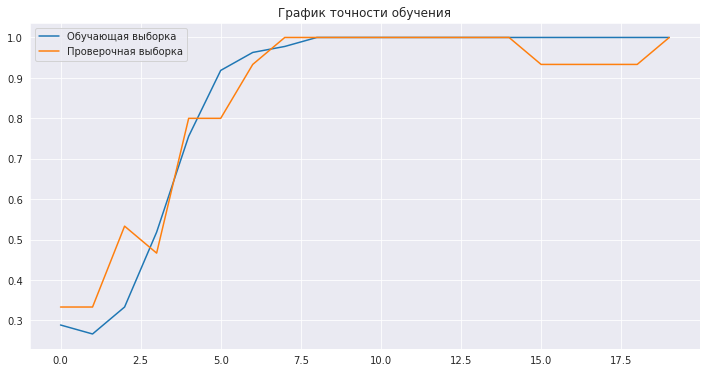

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 20
    )

Укажите в функции терра_ии.тест_модели_классификации тестовую выборку и метки тестовой выборки

Тестовое изображение:


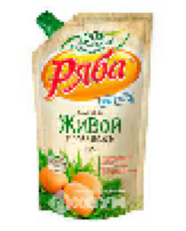


Результат предсказания модели:
Модель распознала модель Ряба на 99.49%
Модель распознала модель Махеев на 0.51%
Модель распознала модель ЕЖК на 0.0%
---------------------------
Правильный ответ:  Ряба
---------------------------


Тестовое изображение:


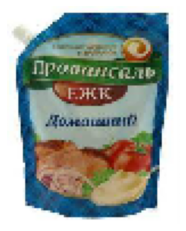


Результат предсказания модели:
Модель распознала модель Ряба на 0.04%
Модель распознала модель Махеев на 0.0%
Модель распознала модель ЕЖК на 99.96%
---------------------------
Правильный ответ:  ЕЖК
---------------------------


Тестовое изображение:


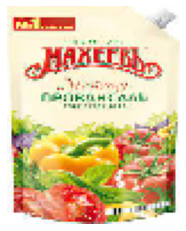


Результат предсказания модели:
Модель распознала модель Ряба на 0.0%
Модель распознала модель Махеев на 100.0%
Модель распознала модель ЕЖК на 0.0%
---------------------------
Правильный ответ:  Махеев
---------------------------


Тестовое изображение:


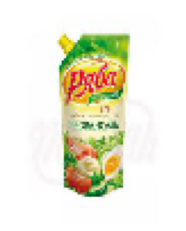


Результат предсказания модели:
Модель распознала модель Ряба на 99.01%
Модель распознала модель Махеев на 0.55%
Модель распознала модель ЕЖК на 0.44%
---------------------------
Правильный ответ:  Ряба
---------------------------


Тестовое изображение:


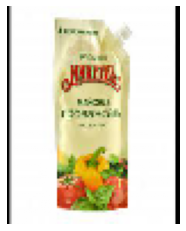


Результат предсказания модели:
Модель распознала модель Ряба на 0.02%
Модель распознала модель Махеев на 99.96%
Модель распознала модель ЕЖК на 0.01%
---------------------------
Правильный ответ:  Махеев
---------------------------




In [ ]:
# Тестируем модель
терра_ии.тест_модели_классификации(
    нейронка,
    тестовый_набор = тестовая_выборка,
    правильные_ответы = метки_тестовой_выборки,
    классы = ['Ряба', 'Махеев', 'ЕЖК'],
    количество = 5)